In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision
import matplotlib.pyplot as plt
import gc

In [2]:
tf.config.optimizer.set_jit(True)

In [3]:
def define_model():
    model = keras.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(10))
    model.add(layers.Activation('softmax', dtype='float32'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [5]:
model = define_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               13107712  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 18s 30ms/step - loss: 0.1491 - accuracy: 0.9535 - val_loss: 0.0488 - val_accuracy: 0.9854
Epoch 2/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 0.0583 - val_accuracy: 0.9833
Epoch 3/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.0412 - val_accuracy: 0.9889
Epoch 4/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 0.0544 - val_accuracy: 0.9852
Epoch 5/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.0406 - val_accuracy: 0.9887
Epoch 6/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0419 - val_accuracy: 0.9902
Epoch 7/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0383 - val_accuracy:

Text(0.5, 0, 'Epoch')

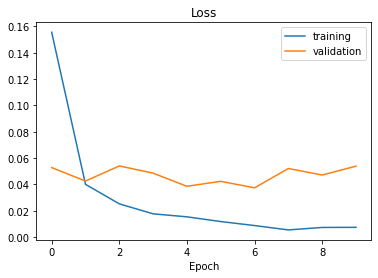

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

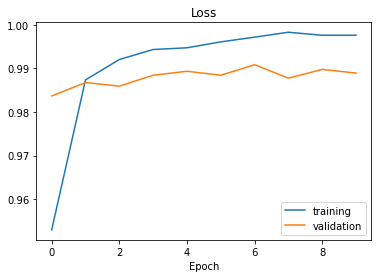

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [8]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

313/313 - 1s - loss: 0.0489 - accuracy: 0.9882
Test loss: 0.04887658357620239
Test accuracy: 0.9882000088691711


In [9]:
del model, history, test_scores
keras.backend.clear_session()
gc.collect()

2828

In [5]:
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)
tf.config.optimizer.set_jit(True)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: GeForce GTX 1650, compute capability 7.5


In [6]:
print('Compute dtype: %s' % policy.compute_dtype)
print('Variable dtype: %s' % policy.variable_dtype)

Compute dtype: float16
Variable dtype: float32


In [7]:
model = define_model()

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
188/188 [==============================] - 27s 85ms/step - loss: 0.2179 - accuracy: 0.9340 - val_loss: 0.0561 - val_accuracy: 0.9840
Epoch 2/10
188/188 [==============================] - 20s 108ms/step - loss: 0.0440 - accuracy: 0.9864 - val_loss: 0.0565 - val_accuracy: 0.9840
Epoch 3/10
188/188 [==============================] - 14s 74ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0416 - val_accuracy: 0.9873
Epoch 4/10
188/188 [==============================] - 14s 73ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0538 - val_accuracy: 0.9857
Epoch 5/10
188/188 [==============================] - 14s 73ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0411 - val_accuracy: 0.9890
Epoch 6/10
118/188 [=================>............] - ETA: 4s - loss: 0.0080 - accuracy: 0.9976

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])